In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
def geometric_brownian_motion(mu, sigma, S0, T, N, dt):
    """
    Generate geometric brownian motion.
 
    Parameters:
        mu (float): Drift coefficient.
        sigma (float): Diffusion coefficient.
        S0 (float): Initial value.
        T (float): Terminal time.
        N (int): Number of time steps.
        dt (float): Time step size.
 
    Returns:
        numpy.ndarray: Simulated GBM path.
    """
    t = np.linspace(0, T, N)
    W = np.random.standard_normal(size=N)
    W = np.cumsum(W) * np.sqrt(dt)  # Standard Brownian motion
    X = (mu - 0.5 * sigma**2) * t + sigma * W
    S = S0 * np.exp(X)  # Geometric Brownian motion
    return S

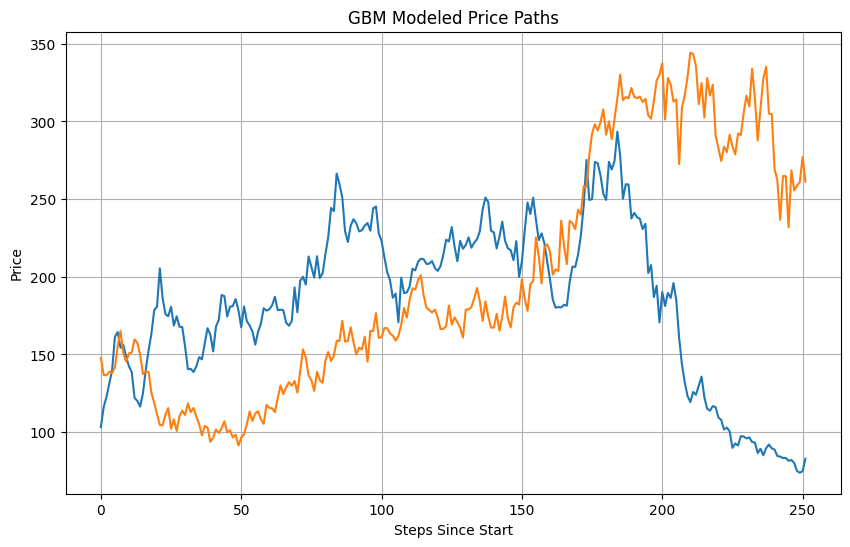

In [18]:
# tickers
tickers =  ['Asset 1', 'Asset 2']

# expected returns (mu) for each ticker (annualized), however due to stochastic drift this does not mean absolute zero returns
drift_coefficient = {
    'Asset 1': 0, 'Asset 2': 0}

# volatilities (sigma) for each ticker (annualized)
diffusion_coefficient = {
    'Asset 1': 0.9, 'Asset 2': 0.9}

# stock prices (S0) for each ticker, arbtrary values
initial_value = {
    'Asset 1': 100, 'Asset 2': 150}

T = 1
N = 252 # * 390 * 60   representative of the time frame we want to model
dt = T/N

prices = {}

for ticker in tickers:
    mu = drift_coefficient[ticker]
    sigma = diffusion_coefficient[ticker]
    S0 = initial_value[ticker]
    prices[ticker] = geometric_brownian_motion(mu, sigma, S0, T, N, dt)

df = pd.DataFrame(prices)

plt.figure(figsize=(10, 6))
plt.title("GBM Modeled Price Paths")
plt.grid()
plt.xlabel("Steps Since Start")
plt.ylabel("Price")
plt.plot(df['Asset 1'])
plt.plot(df['Asset 2'])


In [19]:
df.to_csv('gbm_data.csv')